# Intent
Separate the construction of a complex object from its representation so that the same
construction process can create different representations. 
# Motivation
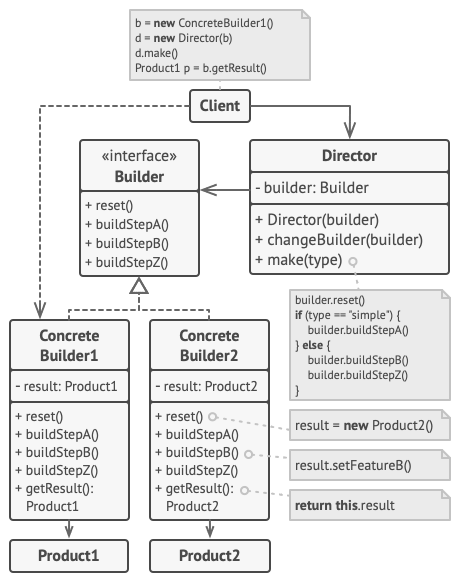 \
<b>The Builder </b> interface declares product construction steps that are common to all types of builders. \
<b>Concrete Builders </b>  provide different implementations of the construction steps. Concrete builders may produce products that don’t follow the common interface. \
<b>Products</b> are resulting objects. Products constructed by different builders don’t have to belong to the same class hierarchy or interface. \
<b>The Director</b> class defines the order in which to call construction steps, so you can create and reuse specific configurations of products. \
<b>The Client</b> must associate one of the builder objects with the director. Usually, it’s done just once, via parameters of the director’s constructor. Then the director uses that builder object for all further construction. However, there’s an alternative approach for when the client passes the builder object to the production method of the director. In this case, you can use a different builder each time you produce something with the director. \

Unlike other creational patterns, Builder doesn’t require products to have a common interface. That makes it possible to produce different products using the same construction process.
# Use the pattern when
• the algorithm for creating a complex object should be independent of the parts
that make up the object and how they're assembled. \
• the construction process must allow different representations for the object that's
constructed. 

In [8]:
from abc import ABC, abstractmethod
from typing import Any


class Builder(ABC):
    """
    The Builder interface specifies methods for creating the different parts of
    the Product objects.
    """

    @property
    @abstractmethod
    def product(self) -> None:
        pass

    @abstractmethod
    def produce_part_a(self) -> None:
        pass

    @abstractmethod
    def produce_part_b(self) -> None:
        pass

    @abstractmethod
    def produce_part_c(self) -> None:
        pass


class ConcreteBuilder1(Builder):
    """
    The Concrete Builder classes follow the Builder interface and provide
    specific implementations of the building steps. Your program may have
    several variations of Builders, implemented differently.
    """

    def __init__(self) -> None:
        """
        A fresh builder instance should contain a blank product object, which is
        used in further assembly.
        """
        self.reset()

    def reset(self) -> None:
        self._product = Product1()

    @property
    def product(self) -> Product1:
        """
        Concrete Builders are supposed to provide their own methods for
        retrieving results. That's because various types of builders may create
        entirely different products that don't follow the same interface.
        Therefore, such methods cannot be declared in the base Builder interface
        (at least in a statically typed programming language).

        Usually, after returning the end result to the client, a builder
        instance is expected to be ready to start producing another product.
        That's why it's a usual practice to call the reset method at the end of
        the `getProduct` method body. However, this behavior is not mandatory,
        and you can make your builders wait for an explicit reset call from the
        client code before disposing of the previous result.
        """
        product = self._product
        self.reset()
        return product

    def produce_part_a(self) -> None:
        self._product.add("PartA1")

    def produce_part_b(self) -> None:
        self._product.add("PartB1")

    def produce_part_c(self) -> None:
        self._product.add("PartC1")


class Product1():
    """
    It makes sense to use the Builder pattern only when your products are quite
    complex and require extensive configuration.

    Unlike in other creational patterns, different concrete builders can produce
    unrelated products. In other words, results of various builders may not
    always follow the same interface.
    """

    def __init__(self) -> None:
        self.parts = []

    def add(self, part: Any) -> None:
        self.parts.append(part)

    def list_parts(self) -> None:
        print(f"Product parts: {', '.join(self.parts)}", end="")


class Director:
    """
    The Director is only responsible for executing the building steps in a
    particular sequence. It is helpful when producing products according to a
    specific order or configuration. Strictly speaking, the Director class is
    optional, since the client can control builders directly.
    """

    def __init__(self) -> None:
        self._builder = None

    @property
    def builder(self) -> Builder:
        return self._builder

    @builder.setter
    def builder(self, builder: Builder) -> None:
        """
        The Director works with any builder instance that the client code passes
        to it. This way, the client code may alter the final type of the newly
        assembled product.
        """
        self._builder = builder

    """
    The Director can construct several product variations using the same
    building steps.
    """

    def build_minimal_viable_product(self) -> None:
        self.builder.produce_part_a()

    def build_full_featured_product(self) -> None:
        self.builder.produce_part_a()
        self.builder.produce_part_b()
        self.builder.produce_part_c()

In [9]:
"""
The client code creates a builder object, passes it to the director and then
initiates the construction process. The end result is retrieved from the
builder object.
"""

director = Director()
builder = ConcreteBuilder1()
director.builder = builder

print("Standard basic product: ")
director.build_minimal_viable_product()
builder.product.list_parts()

print("\n")

print("Standard full featured product: ")
director.build_full_featured_product()
builder.product.list_parts()

print("\n")

# Remember, the Builder pattern can be used without a Director class.
print("Custom product: ")
builder.produce_part_a()
builder.produce_part_b()
builder.product.list_parts()

True